In [3]:
import pandas as pd
import numpy as np
from nilearn import input_data
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
import glob
from tqdm import tqdm
from nilearn.connectome import ConnectivityMeasure
import os

In [4]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm', symmetric_split= True)
atlas_filename = dataset.maps
labels = dataset.labels[1:]

[get_dataset_dir] Dataset found in C:\Users\USER\nilearn_data\fsl


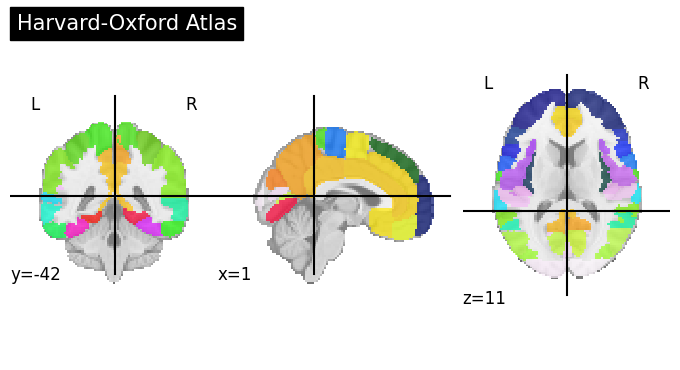

In [5]:
from nilearn import plotting
import matplotlib
plot = plotting.plot_roi(atlas_filename, title='Harvard-Oxford Atlas')
plot

In [6]:
masker_cor = NiftiLabelsMasker(labels_img=atlas_filename, standardize= True,
                               memory='nilearn_cache', verbose=0)

[get_dataset_dir] Dataset found in C:\Users\USER\nilearn_data\fsl


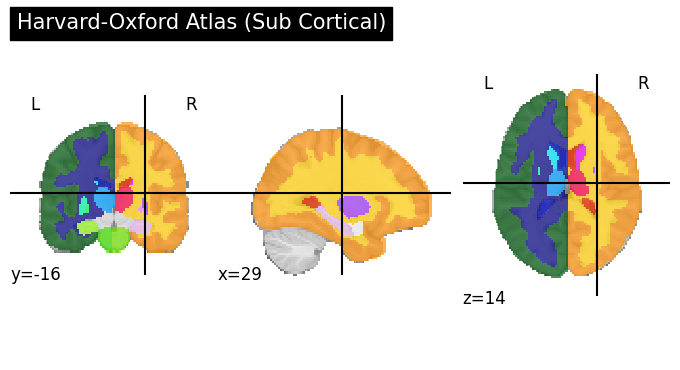

In [7]:
dataset = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-2mm', symmetric_split=True)
atlas_filename = dataset.maps
labels_s = dataset.labels[1:0]
masker_sub = NiftiLabelsMasker(labels_img=atlas_filename, standardize= True,
                               memory='nilearn_cache', verbose=0)
plot = plotting.plot_roi(atlas_filename, title='Harvard-Oxford Atlas (Sub Cortical)')
plot


In [8]:
# import shutil
# shutil.rmtree('none', ignore_errors=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../Data/abide.csv")

atlas_name = "HO_sub"

for i in tqdm(range(len(df))):
    fmri_filename = df["RSFMRI_file"].iloc[i]
    sub_path = df["tc_file"].iloc[i].replace("ATLAS", atlas_name).replace("/timecourse.csv", "")
    if (df["Sub_id"].iloc[i] == 50102) or (df["Sub_id"].iloc[i] == 50104) or (df["Sub_id"].iloc[i] == 50282) or (df["Sub_id"].iloc[i] == 50283) or (df["Sub_id"].iloc[i] == 50284) or (df["Sub_id"].iloc[i] == 50285) or (df["Sub_id"].iloc[i] == 50737) or (df["Sub_id"].iloc[i] == 50738):
        continue
    # tc = np.load(sub_path + "/tc.npy")
    if not os.path.isdir(sub_path):
        os.makedirs(sub_path)

        time_series_c = masker_cor.fit_transform(fmri_filename)
        time_series_s = masker_sub.fit_transform(fmri_filename)
        tc = np.concatenate((time_series_c, time_series_s), axis=1)

        correlation_measure = ConnectivityMeasure(kind='correlation')
        cc = correlation_measure.fit_transform([tc])[0]
        
        np.save(sub_path +'/tc.npy', tc)
        np.save(sub_path +'/cc.npy', cc)


# df.shape
# df[((df["SITE_ID"] == "Pitt") & (df["Sub_id"] == 50004)) | ((df["SITE_ID"] == "NYU") & (df["Sub_id"] == 51040))]
# df.iloc[250]["RSFMRI_file"]
# 50102 - 50104 - 50282 - 50283 - 50284 - 50285 - 50737 - 50738


100%|██████████| 884/884 [00:06<00:00, 146.17it/s]


In [39]:
df.iloc[45]["RSFMRI_file"]

'../abide_data/Outputs/cpac/nofilt_noglobal/func_preproc/Olin_0050102_func_preproc.nii.gz'

In [50]:
final_df = df[~((df["Sub_id"] == 50102) | (df["Sub_id"] == 50104) 
                | (df["Sub_id"] == 50282) | (df["Sub_id"] == 50283) 
                | (df["Sub_id"] == 50284) | (df["Sub_id"] == 50285) 
                | (df["Sub_id"] == 50737) | (df["Sub_id"] == 50738))]

final_df

,Unnamed: 0,Unnamed: 0.1,SITE_ID,Sub_id,Diagnosis,Age,Sex,RSFMRI_file,tc_file,cc_file,corrvec_file
0,3,2,Pitt,50004,1,19.09,1,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
1,4,3,Pitt,50005,1,13.73,2,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
2,5,4,Pitt,50006,1,13.37,1,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
3,6,5,Pitt,50007,1,17.78,1,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
4,7,6,Pitt,50008,1,32.45,1,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
...,...,...,...,...,...,...,...,...,...,...,...
879,1108,1107,SBL,51583,1,35.00,1,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
880,1109,1108,SBL,51584,1,49.00,1,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
881,1110,1109,SBL,51585,1,27.00,1,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...
882,1111,1110,MaxMun,51606,1,29.00,2,../abide_data/Outputs/cpac/nofilt_noglobal/fun...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...,../abide_data/Outputs/cpac/nofilt_noglobal/met...


In [51]:
final_df.to_csv("../Data/final_abide.csv", index= False)


C:\Users\USER\AppData\Local\Temp\ipykernel_24296\4119285245.py:10: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img_4d = mean_img(fmri_path)


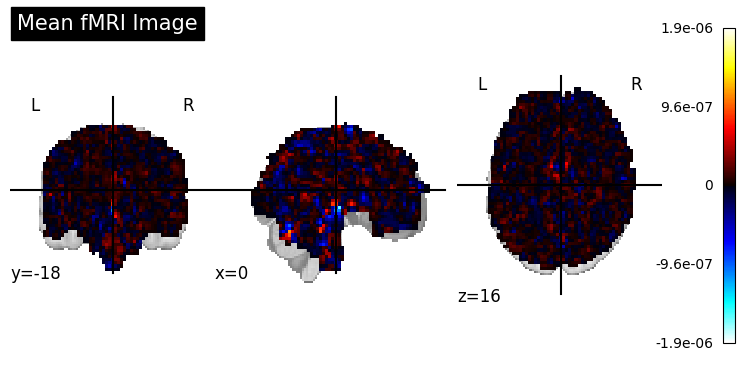

In [5]:
import nibabel as nib
from nilearn.image import mean_img
from nilearn import plotting

# Show the image

# fmri_path = df["RSFMRI_file"].iloc[800]
fmri_path = "D:/AUT/Final_Project/Code/abide_data/Outputs/cpac/nofilt_noglobal/func_preproc/Caltech_0051487_func_preproc.nii.gz"
img = nib.load(fmri_path)
mean_img_4d = mean_img(fmri_path)
plotting.plot_stat_map(mean_img_4d, display_mode='ortho', title='Mean fMRI Image', threshold=0.0)
plotting.show()
# print("fMRI shape:", img.shape)

In [ ]:
sub_path = df["tc_file"].iloc[19].replace("ATLAS", atlas_name).replace("/timecourse.csv", "")
tc = np.load(sub_path + "/tc.npy")
cc = np.load(sub_path + "/cc.npy")

# print(tc)
print(cc[:5, :5])

[[ 1.          0.47662432 -0.03438292  0.03768619  0.60398582]
 [ 0.47662432  1.          0.07753456  0.20137305  0.34230903]
 [-0.03438292  0.07753456  1.          0.71082229 -0.1620148 ]
 [ 0.03768619  0.20137305  0.71082229  1.         -0.13431065]
 [ 0.60398582  0.34230903 -0.1620148  -0.13431065  1.        ]]


In [25]:
import nibabel as nib
# D:/AUT/Final_Project/Code/
# path
# path = "D:/AUT/Final_Project/Code//Data/images_zip/Outputs/cpac/nofilt_noglobal/extracted_reho/Pitt_0050012_reho.nii"
# path = "../Data/images_zip/Outputs/cpac/nofilt_noglobal/extracted_reho/Caltech_0051456_reho.nii"
path = df.iloc[0]["fmri_file"]
img = nib.load(path).get_fdata()
img.shape
# path

(61, 73, 61)